In [1]:
# Lab 9 XOR
import torch

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [4]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
cmap = matplotlib.cm.get_cmap('bwr')
normalize = matplotlib.colors.Normalize(vmin=0, vmax=1)

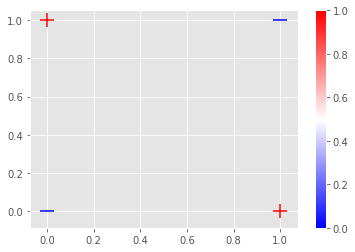

In [6]:
fig, ax = plt.subplots()
for i, vals in enumerate(Y.squeeze().int().numpy()):
    shp = "+" if vals == 1 else "_"
    col = cmap(normalize(vals))
    ax.scatter(X[i, 0], X[i, 1], marker = shp, s = 200, color = col)
    
# Optionally add a colorbar
cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)

plt.show()

In [7]:
# nn layers
linear = torch.nn.Linear(2, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

In [8]:
# model
model = torch.nn.Sequential(linear, sigmoid).to(device) # 1층짜리

In [9]:
# define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [10]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 1000 == 0:
        print(step, cost.item())

0 0.7273974418640137
1000 0.6931471824645996
2000 0.6931471824645996
3000 0.6931471824645996
4000 0.6931471824645996
5000 0.6931471824645996
6000 0.6931471824645996
7000 0.6931471824645996
8000 0.6931471824645996
9000 0.6931471824645996
10000 0.6931471824645996


In [11]:
# Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())


Hypothesis:  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Correct:  [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy:  0.5


## Visualize!

In [12]:
step = 30
a = torch.linspace(0.0, 1, step)
x1_t = a.repeat(step).unsqueeze(1)
x2_t = a.repeat_interleave(step).unsqueeze(1)

X_t = torch.cat([x1_t, x2_t], 1)
pred_t = model(X_t)
pred_t = pred_t.squeeze().detach().numpy()

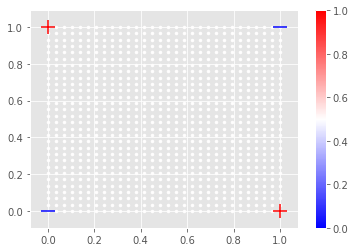

In [13]:
colors = [cmap(normalize(value)) for value in pred_t]

fig, ax = plt.subplots()

for i in range(len(pred_t)):
    ax.scatter(X_t[i, 0], X_t[i, 1], marker = ".", color = colors[i])

    
for i, vals in enumerate(Y.squeeze().int().numpy()):
    shp = "+" if vals == 1 else "_"
    col = cmap(normalize(vals))
    ax.scatter(X[i, 0], X[i, 1], marker = shp, s = 200, color = col)
    
# Optionally add a colorbar
cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
    
plt.show()